<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [23]:
import pandas as pd
import numpy as np
# exp_0726_OJIP_p
df = pd.read_csv("/content/nahut_0606.csv", delimiter='\t', decimal=',') # delimiter '\t' or ';'

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [24]:
names = df.pop('groups')
transposed_df = df.T
named = np.array(names)
transposed_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
etOH,31.92,32.00,26.60,23.08,33.08,34.44,32.8,34.28,34.88,37.20,...,36.36,35.80,40.80,38.80,47.84,NaN,41.92,41.60,62.8,64.00
water,9.68,9.88,5.92,7.20,11.04,10.52,7.6,8.24,8.36,8.32,...,9.76,9.84,12.24,11.48,12.40,12.48,9.72,9.68,11.2,8.36


1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [25]:
import re
# Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
for i in range(len(names)):
    c = names[i][0]
    names[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', names[i])
names

0      1`
1      1`
2      2`
3      2`
4      3`
5      3`
6      4`
7      4`
8      5`
9      5`
10     6`
11     6`
12     7`
13     7`
14     8`
15     8`
16     9`
17     9`
18    10`
19    10`
20    11`
21    11`
22    12`
23    12`
24    13`
25    13`
26    14`
27    14`
28    15`
29    15`
30    16`
31    16`
32    17`
33    17`
34    18`
35    18`
36    19`
37    19`
38    20`
39    20`
40    21`
41    21`
42    22`
43    22`
Name: groups, dtype: object

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

In [33]:
params = df.pop('water') #required param
transp_df = params.T

#dff = np.array(params)

1.5) Converting the dataframe into a 1D numpy array

In [34]:
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values

#split matrix into 3 columns each into 1d array

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array)

# variants as well:
print(names)

[ 9.68  9.88  5.92  7.2  11.04 10.52  7.6   8.24  8.36  8.32  9.32 10.32
  8.16  7.32  5.4   5.72  7.8   7.6   7.48  6.84  9.72 10.28  9.24  8.
  8.8   9.04 10.36  9.32  8.24  8.32 11.64 11.88 10.96 10.8   9.76  9.84
 12.24 11.48 12.4  12.48  9.72  9.68 11.2   8.36]
0      1`
1      1`
2      2`
3      2`
4      3`
5      3`
6      4`
7      4`
8      5`
9      5`
10     6`
11     6`
12     7`
13     7`
14     8`
15     8`
16     9`
17     9`
18    10`
19    10`
20    11`
21    11`
22    12`
23    12`
24    13`
25    13`
26    14`
27    14`
28    15`
29    15`
30    16`
31    16`
32    17`
33    17`
34    18`
35    18`
36    19`
37    19`
38    20`
39    20`
40    21`
41    21`
42    22`
43    22`
Name: groups, dtype: object


####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [35]:
# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': names,
    'Value': one_D_array
})

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

In [36]:
import statsmodels.stats.multicomp as mc

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

print(result.summary(), len(result.reject))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10`    11`     2.84 0.0139  0.3658  5.3142   True
   10`    12`     1.46 0.6972 -1.0142  3.9342  False
   10`    13`     1.76 0.4002 -0.7142  4.2342  False
   10`    14`     2.68 0.0246  0.2058  5.1542   True
   10`    15`     1.12 0.9452 -1.3542  3.5942  False
   10`    16`      4.6    0.0  2.1258  7.0742   True
   10`    17`     3.72 0.0006  1.2458  6.1942   True
   10`    18`     2.64 0.0283  0.1658  5.1142   True
   10`    19`      4.7    0.0  2.2258  7.1742   True
   10`     1`     2.62 0.0303  0.1458  5.0942   True
   10`    20`     5.28    0.0  2.8058  7.7542   True
   10`    21`     2.54   0.04  0.0658  5.0142   True
   10`    22`     2.62 0.0303  0.1458  5.0942   True
   10`     2`     -0.6    1.0 -3.0742  1.8742  False
   10`     3`     3.62 0.0008  1.1458  6.0942   True
   10`     4`     0.76 0.9991 -1.7142  3.2342 

In [37]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [41]:
# define columns for data and then grouping
col_to_group='Variant'
col_for_data='Value'

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby('Variant')['Value']]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data['Value'], data['Variant'])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


0        ab
1     cdefg
2     acdeh
3     acdeh
4      cdef
5       ach
6        fg
7       dfg
8      cdef
9        fg
10     cdef
11        g
12     cdef
13     cdef
14      abh
15     defg
16     abch
17     aceh
18    cdefh
19     abch
20        b
21     abch
dtype: object

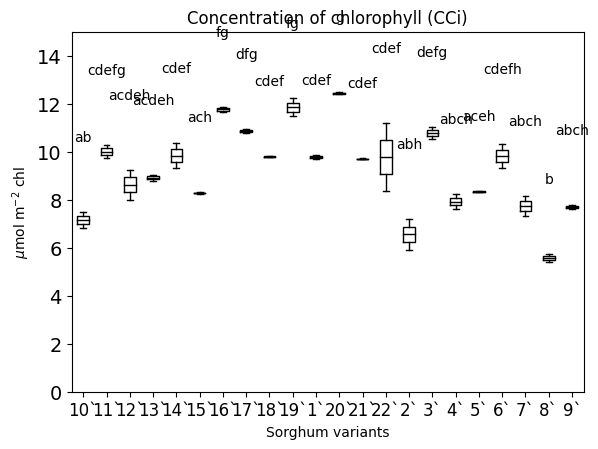

In [40]:

#Now to plot like R with a violing plot
fig,ax=plt.subplots()
data.boxplot(column=col_for_data, by=col_to_group,ax=ax,fontsize=14, color='black')

#,showmeans=True
#,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

grps=pd.unique(data[col_to_group].values)   #Finds the group names
grps.sort() # This is critical!  Puts the groups in alphabeical order to make it match the plotting

#props=dict(facecolor='white',alpha=1)
''''''
for i,grp in enumerate(grps):   #I loop through the groups to make the scatters and figure out the axis labels.
    y_pos = data[data['Variant'] == grp]['Value'].max() + 3.4
    #y_pos = ax.get_ylim()[1]*1
    ax.text(i+1,y_pos,df_ltr.sum(axis=1)[i],rotation=0,fontsize=10,verticalalignment='top',horizontalalignment='center')

ax.set_xticklabels(grps,rotation=0,fontsize=12)
#ax.set_xticks()
ax.set_ylim([0, 15])
ax.set(title='Concentration of chlorophyll (CCi)', ylabel=r'$\mu$mol m$^{-2}$ chl', xlabel="Sorghum variants")
fig.suptitle('')

# PI $_{ABS}$ (performance index)
#

# CO$_2$ uptake (A$_{n}$)
# r'$\mu$mol m$^{-2}$s$^{-1}$ CO$_2$'

# Concentration of chlorophyll (CCi)
# $\mu$mol m$^{-2}$ chl

# TAC - water extracts
# mM AAE g${^-1}$

# PI $_{ABS}$
# (a.u.)

plt.grid(False)
#fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')